<h1>Analiza otyłości</h1>

<h3>Wstęp</h3>


Link do zbioru danych: <https://www.kaggle.com/datasets/muhramasaputra/obesity-based-on-eating-habits-and-physical-cond> (Pobrane 11.01.2024)

Zbiór posiada 19 kolumn (atrybutów) oraz 2111 wierszy.
<ul>
<li>Gender wynosi 1, jeśli respondentem jest mężczyzna i 0, jeśli respondentem jest kobieta.</li>
<li>Age to wiek respondenta w latach.</li>
<li>family_history_with_overweight wynosi 1, jeśli respondent ma w rodzinie osobę, która ma lub miała nadwagę, 0, jeśli nie.</li>
<li>FAVC wynosi 1, jeśli respondent często spożywa żywność wysokokaloryczną, 0, jeśli nie.</li>
<li>FCVC wynosi 1, jeśli respondent zazwyczaj je warzywa w swoich posiłkach, 0, jeśli nie.</li>
<li>NCP pokazuje, ile głównych posiłków dziennie spożywa respondent (0 przy 1-2 posiłkach, 1 przy 3 posiłkach i 2 przy więcej niż 3 posiłkach).</li>
<li>CAEC pokazuje, ile pokarmu respondent zjada pomiędzy posiłkami w skali od 0 do 3.</li>
<li>SMOKE wynosi 1, jeśli respondent pali, 0, jeśli nie.</li>
<li>CH2O pokazuje, ile wody wypija respondent w skali od 0 do 2.</li>
<li>SCC wynosi 1, jeśli respondent monitoruje swoje spożycie kalorii, 0, jeśli nie.</li>
<li>FAF określa, jak dużo aktywności fizycznej podejmuje respondent w skali od 0 do 3.</li>
<li>TUE pokazuje, ile czasu respondent spędza, patrząc na urządzenia z ekranami w skali od 0 do 2.</li>
<li>CALC pokazuje, jak często respondent pije alkohol w skali od 0 do 3.</li>
<li>Automobile</li>
<li>Bike</li>
<li>Motorbike</li>
<li>Public_Transportation</li>
<li>Walking wskazują główny środek transportu respondenta. Ich główny środek transportu jest oznaczony cyfrą 1, a pozostałe kolumny będą zawierać cyfrę 0.</li>
<li>NObeyesdad wynosi 1, jeśli pacjent jest otyły i 0, jeśli nie.</li>
</ul>

<h3>Import bibliotek</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Wczytanie i ogląd danych</h3>

In [2]:
#df = pd.read_csv("obesity.csv", )
path = "C:/Users/zebro/Desktop/obesity.csv"
df = pd.read_csv(path, low_memory=False)
#df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int64  
 1   Age                             2111 non-null   float64
 2   family_history_with_overweight  2111 non-null   int64  
 3   FAVC                            2111 non-null   int64  
 4   FCVC                            2111 non-null   float64
 5   NCP                             2111 non-null   float64
 6   CAEC                            2111 non-null   int64  
 7   SMOKE                           2111 non-null   int64  
 8   CH2O                            2111 non-null   float64
 9   SCC                             2111 non-null   int64  
 10  FAF                             2111 non-null   float64
 11  TUE                             2111 non-null   float64
 12  CALC                            21

In [3]:
nie01=['Age','NCP','CH2O','FAF','TUE','CALC']
df.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Automobile,Bike,Motorbike,Public_Transportation,Walking,NObeyesdad
0,0,21.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,0,0,0,1,0,0
1,0,21.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,0,0,0,1,0,0
2,1,23.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,0,0,0,1,0,0
3,1,27.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,0,0,0,0,1,0
4,1,22.0,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,0,0,0,1,0,0


<h3>Sprawdzenie czy występują duplikaty</h3>

In [6]:
duplicated_rows = df.duplicated()
duplicated_rows[duplicated_rows == True].sum()

29

<h3>Sprawdzenie czy nie brakuje danych</h3>

In [11]:
#df.count()
df.isnull().sum()

Gender                            0
Age                               0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
Automobile                        0
Bike                              0
Motorbike                         0
Public_Transportation             0
Walking                           0
NObeyesdad                        0
dtype: int64

<h2>Podstawowa analiza danych</h2>
<h3>Statystyki</h3>

In [18]:
df.describe()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Automobile,Bike,Motorbike,Public_Transportation,Walking,NObeyesdad
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,0.505921,24.312600,0.817622,0.883941,2.419043,2.685628,1.140692,0.020843,2.008011,0.045476,1.010298,0.657866,0.731407,0.216485,0.003316,0.005211,0.748460,0.026528,0.460445
std,0.500083,6.345968,0.386247,0.320371,0.533927,0.778039,0.468543,0.142893,0.612953,0.208395,0.850592,0.608927,0.515498,0.411946,0.057502,0.072015,0.434001,0.160737,0.498551
min,0.000000,14.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.947192,1.000000,1.000000,2.000000,2.658738,1.000000,0.000000,1.584812,0.000000,0.124505,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,22.777890,1.000000,1.000000,2.385502,3.000000,1.000000,0.000000,2.000000,0.000000,1.000000,0.625350,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,26.000000,1.000000,1.000000,3.000000,3.000000,1.000000,0.000000,2.477420,0.000000,1.666678,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,61.000000,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,3.000000,1.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<h5>NCP niezgodne z opisem datasetu, poniżej wykrycie błędu</h5>

<h2>Dla pojedyńczych zmiennych</h2>
<h3>Gender</h3>

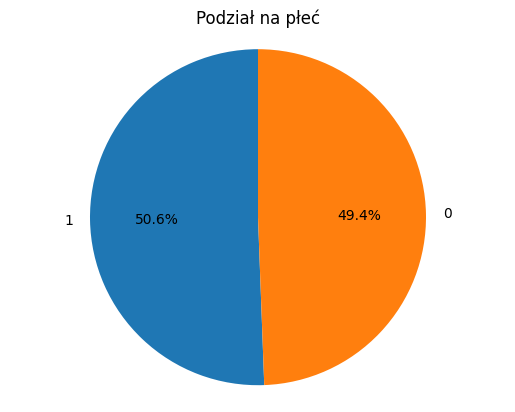

In [46]:
counts = df['Gender'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Podział na płeć')
plt.show()

<h3>Age</h3>

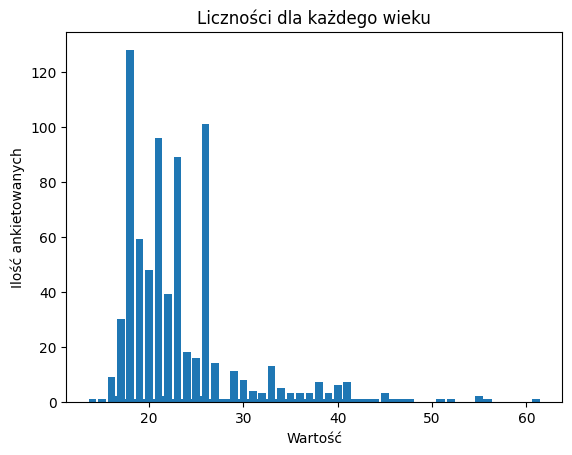

In [33]:
counts = df['Age'].value_counts()
plt.bar(counts.index, counts.values)
plt.xlabel('Wartość')
plt.ylabel('Ilość ankietowanych')
plt.title('Liczności dla każdego wieku')
plt.show()

<h5>Dla czytelności wykresu podzielimy na grupy wiekowe</h5>

In [56]:
age_groups = ["{0} - {1}".format(i, i + 4) for i in range(20, 65, 5)]
df['Age Group'] = pd.cut(df['Age'], range(20, 70, 5), right=False, labels=age_groups)
df[['Age', 'Age Group']].head()

,Age,Age Group
0,21.0,20 - 24
1,21.0,20 - 24
2,23.0,20 - 24
3,27.0,25 - 29
4,22.0,20 - 24


In [57]:
df['Age Group'].value_counts()

20 - 24    816
25 - 29    394
30 - 34    193
35 - 39    108
40 - 44     46
45 - 49      7
55 - 59      6
50 - 54      3
60 - 64      1
Name: Age Group, dtype: int64

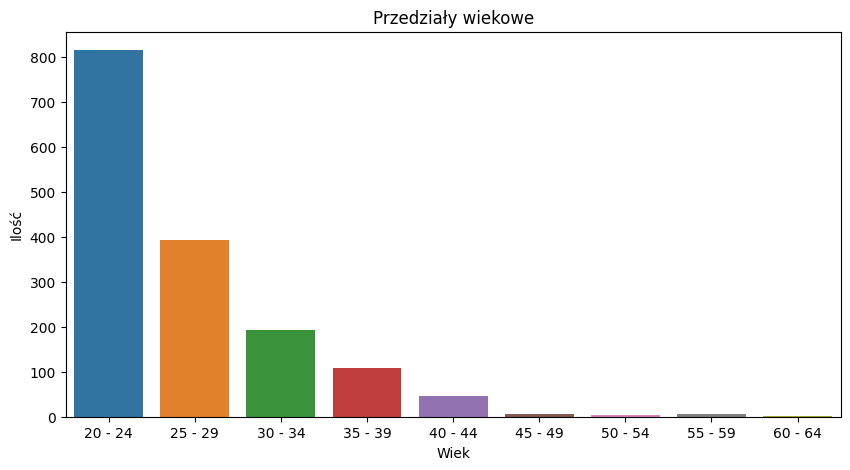

In [58]:
fig, axes = plt.subplots(figsize=(10,5))
g = sns.countplot(x='Age Group', data=df)
g.set_title('Przedziały wiekowe')
g.set_xlabel('Wiek')
g.set_ylabel('Ilość')
plt.show()

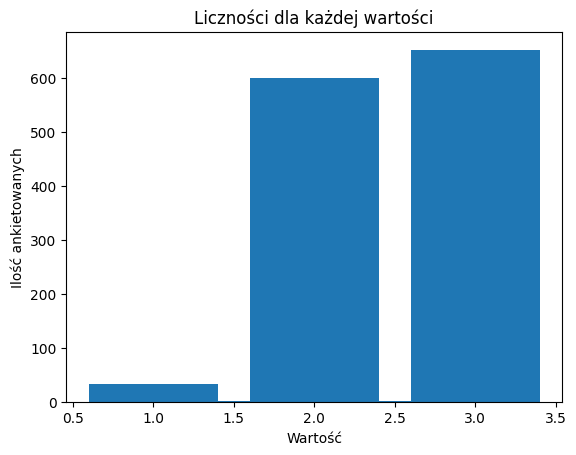

In [7]:
counts = df['FCVC'].value_counts()
plt.bar(counts.index, counts.values)
plt.xlabel('Wartość')
plt.ylabel('Ilość ankietowanych')
plt.title('Liczności dla każdej wartości')
plt.show()

<h3>Nadwaga w rodzinie, Kaloryczność posiłków FAVC, Częstość spożycia warzyw FCVC, Ilość posiłków/24h NCP</h3>

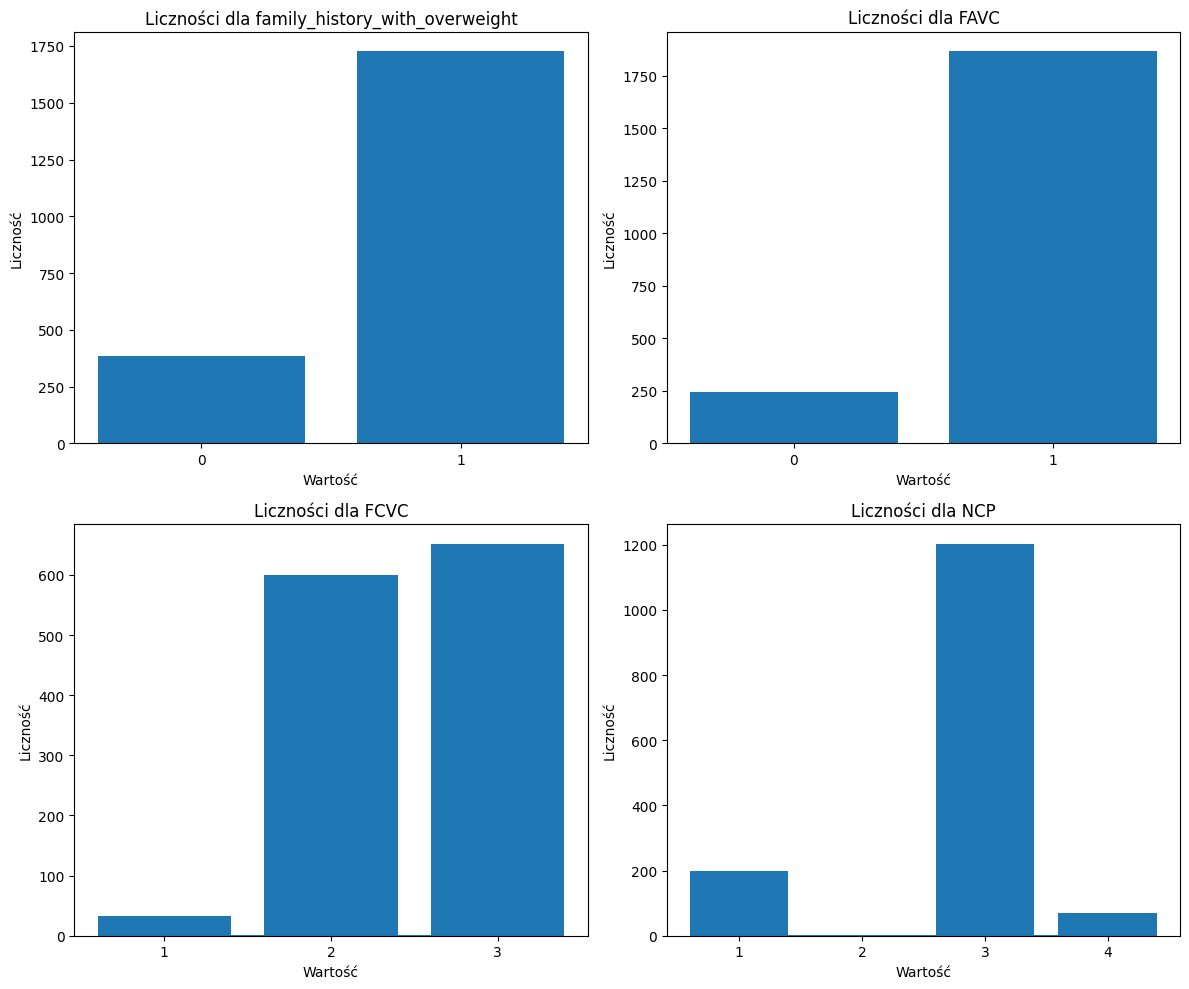

3.000000    1203
1.000000     199
4.000000      69
2.776840       2
3.985442       2
            ... 
3.054899       1
3.118013       1
3.335876       1
3.205009       1
1.089048       1
Name: NCP, Length: 635, dtype: int64


In [27]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
for i, col in enumerate(['family_history_with_overweight', 'FAVC', 'FCVC', 'NCP']):
    counts = df[col].value_counts()
    ax = axes[i//2, i%2]
    ax.bar(counts.index, counts.values)
    ax.set_xticks(range(int(min(counts.index)), int(max(counts.index)) + 1))
    ax.set_title(f'Liczności dla {col}')
    ax.set_xlabel('Wartość')
    ax.set_ylabel('Liczność')

plt.tight_layout()
plt.show()
print(df['NCP'].value_counts())

<h3>Częstość podjadania CAEC, Palacze SMOKE, Ilość pitej wody CH20, Liczenie kalorii SCC</h3>

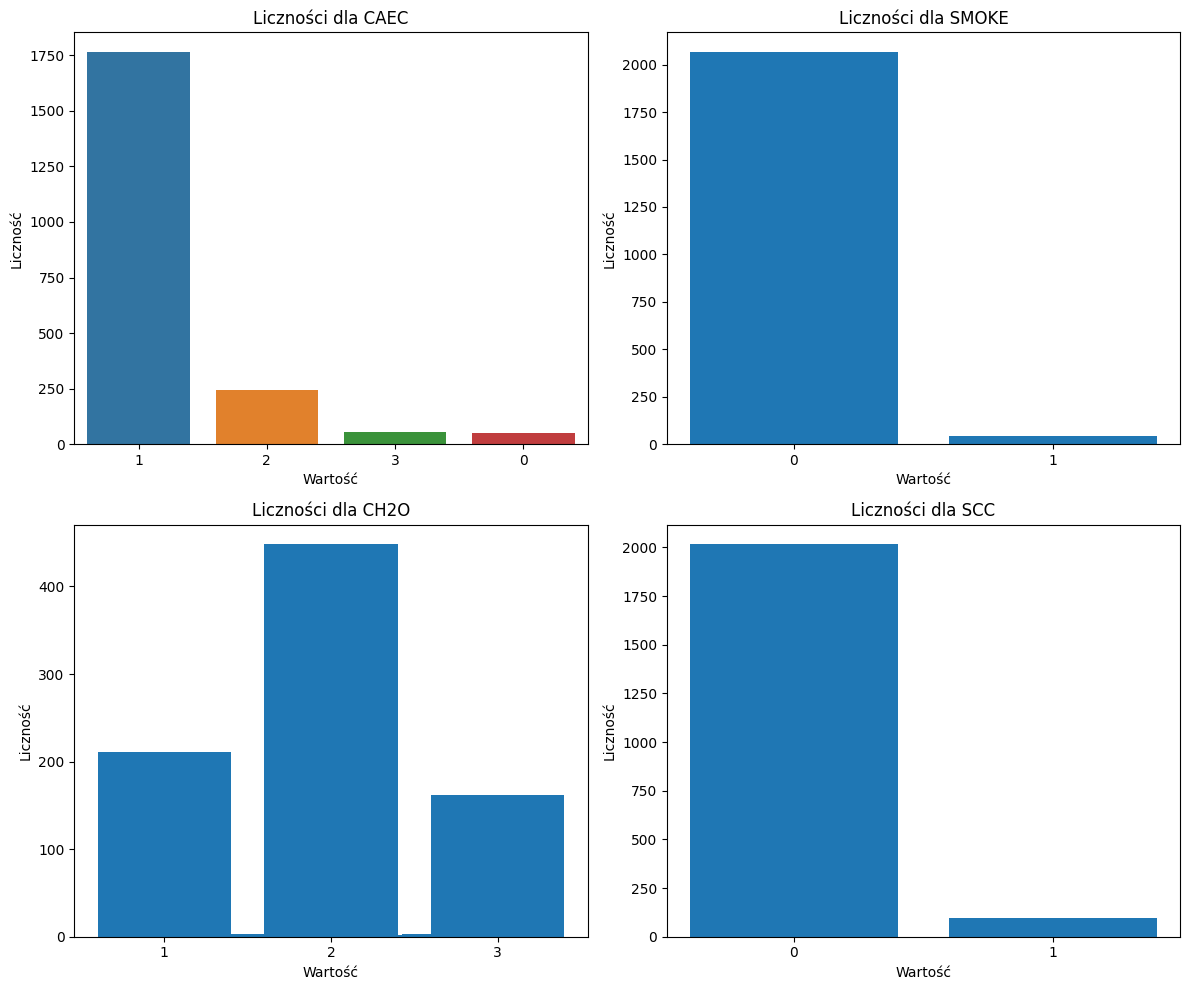

2.000000    448
1.000000    211
3.000000    162
2.825629      3
1.636326      3
           ... 
1.622638      1
2.452986      1
2.035954      1
1.944095      1
2.863513      1
Name: CH2O, Length: 1268, dtype: int64


In [30]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
for i, col in enumerate(['CAEC', 'SMOKE', 'CH2O', 'SCC']):
    counts = df[col].value_counts()
    ax = axes[i//2, i%2]
    
    if col == 'CAEC':
        sns.countplot(x=col, data=df, ax=ax, order=df[col].value_counts().index)
    else:
        ax.bar(counts.index, counts.values)
        ax.set_xticks(range(int(min(counts.index)), int(max(counts.index)) + 1))

    ax.set_title(f'Liczności dla {col}')
    ax.set_xlabel('Wartość')
    ax.set_ylabel('Liczność')

plt.tight_layout()
plt.show()
print(df['CH2O'].value_counts())

<h3>Aktywność sportowa 'FAF', Czas patrzenia w ekrany 'TUE', Spożycie alkoholu 'CALC', Czy otyły 'NObeyesdad'</h3>

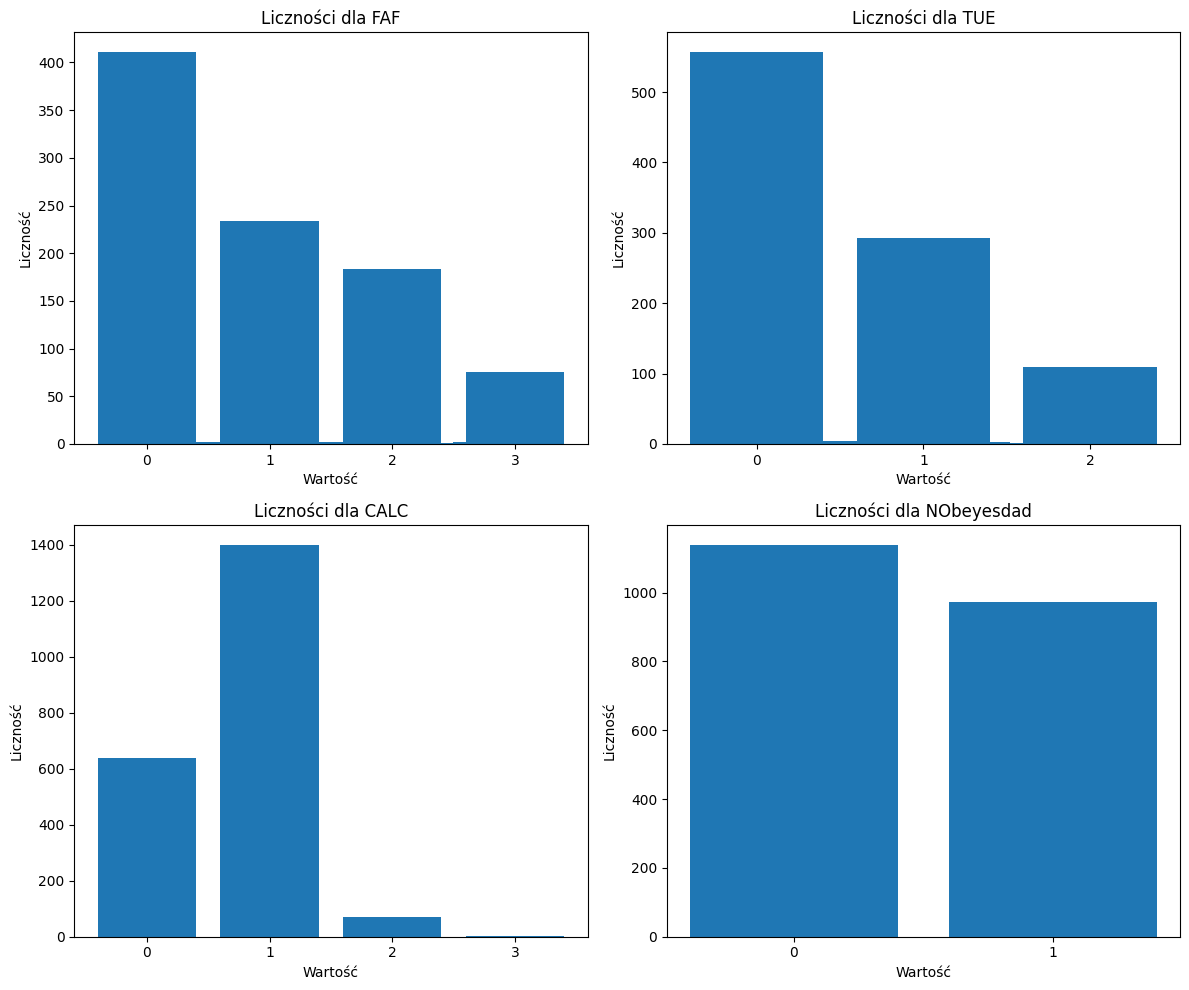

0.000000    411
1.000000    234
2.000000    183
3.000000     75
0.110174      2
           ... 
1.916751      1
0.954459      1
0.340915      1
0.986414      1
1.026452      1
Name: FAF, Length: 1190, dtype: int64
0.000000    557
1.000000    292
2.000000    109
0.630866      4
1.119877      3
           ... 
1.343044      1
1.019452      1
0.673408      1
0.997600      1
0.714137      1
Name: TUE, Length: 1129, dtype: int64


In [32]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
for i, col in enumerate(['FAF', 'TUE', 'CALC', 'NObeyesdad']):
    counts = df[col].value_counts()
    ax = axes[i//2, i%2]
    ax.bar(counts.index, counts.values)
    ax.set_xticks(range(int(min(counts.index)), int(max(counts.index)) + 1))
    ax.set_title(f'Liczności dla {col}')
    ax.set_xlabel('Wartość')
    ax.set_ylabel('Liczność')

plt.tight_layout()
plt.show()
print(df['FAF'].value_counts())
print(df['TUE'].value_counts())

<h3>Używane rodzaje transportu</h3>

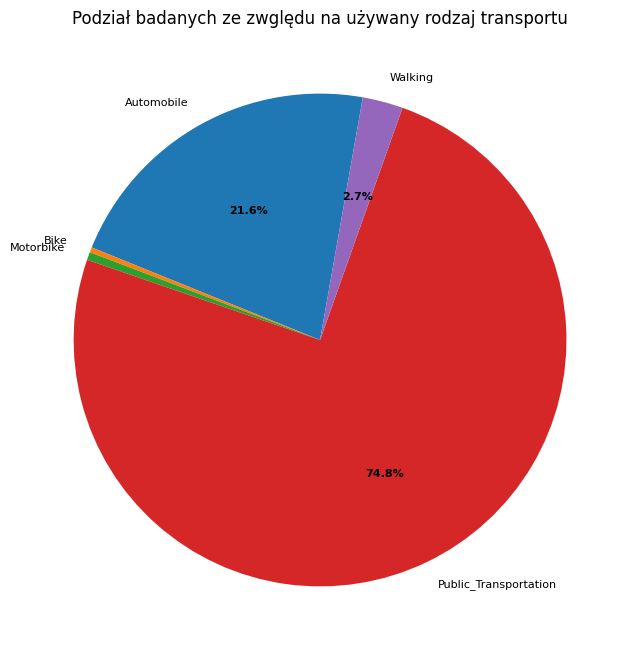

In [70]:
transport_columns = ['Automobile', 'Bike', 'Motorbike', 'Public_Transportation', 'Walking']
transport_counts = df[transport_columns].sum()

plt.figure(figsize=(8, 8))
threshold = 1.0
wedges, texts, autotexts = plt.pie(transport_counts, labels=transport_counts.index, autopct=lambda p: '{:.1f}%'.format(p) if p > threshold else '', startangle=80)

for text, autotext in zip(texts, autotexts):
    text.set(size=8)
    autotext.set(size=8, weight='bold')
plt.title('Podział badanych ze względu na używany rodzaj transportu')

plt.show()

<h2>Zależności między kategoriami</h2>
<h3>Spożycie warzyw i alkoholu ze względu na płeć</h3>

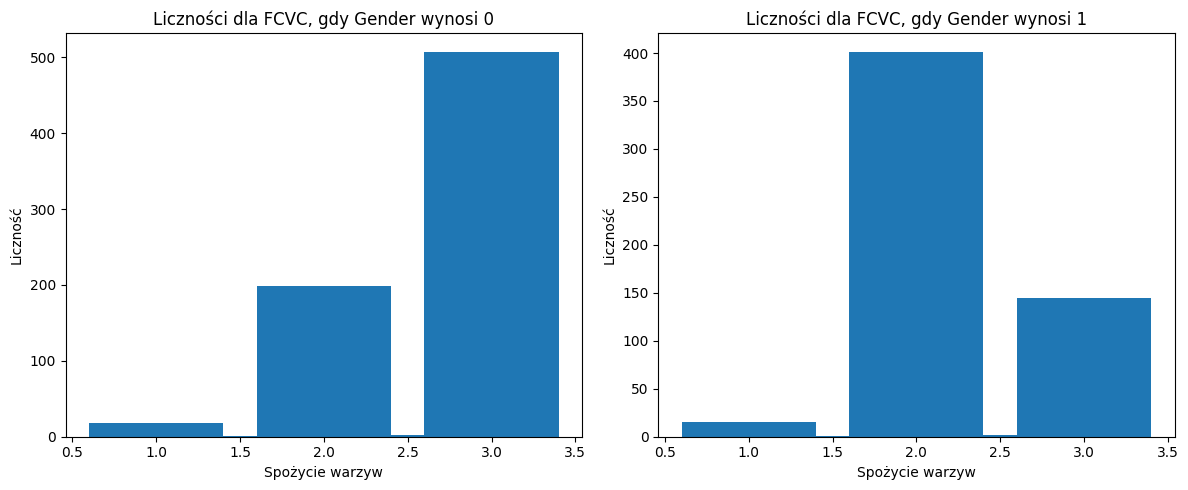

In [39]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
for i, gender_value in enumerate([0, 1]):
    filtered_gender = df[df['Gender'] == gender_value]
    counts = filtered_gender['FCVC'].value_counts()
    
    axes[i].bar(counts.index, counts.values)
    axes[i].set_xlabel('Spożycie warzyw')
    axes[i].set_ylabel('Liczność')
    axes[i].set_title(f'Liczności dla FCVC, gdy Gender wynosi {gender_value}')

plt.tight_layout()
plt.show()

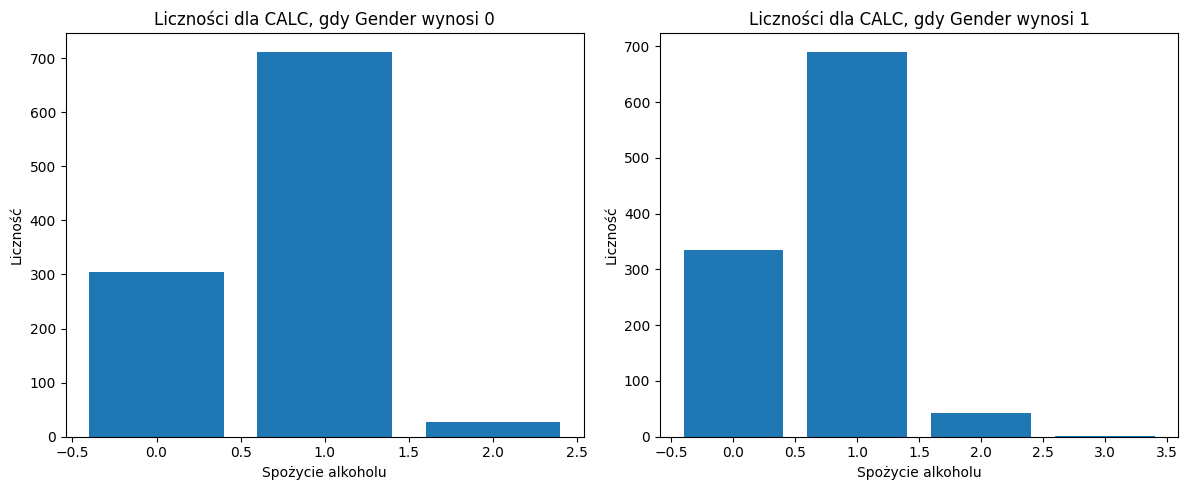

1    1401
0     639
2      70
3       1
Name: CALC, dtype: int64


In [41]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
for i, gender_value in enumerate([0, 1]):
    filtered_gender = df[df['Gender'] == gender_value]
    counts = filtered_gender['CALC'].value_counts()
    
    axes[i].bar(counts.index, counts.values)
    axes[i].set_xlabel('Spożycie alkoholu')
    axes[i].set_ylabel('Liczność')
    axes[i].set_title(f'Liczności dla CALC, gdy Gender wynosi {gender_value}')

plt.tight_layout()
plt.show()
print(df['CALC'].value_counts())